In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
try:
    data = pd.read_csv("eci_data_2024.csv", encoding="utf-8")
except UnicodeDecodeError:
    print("Failed to read with UTF-8 encoding.")
    try:
        data = pd.read_csv("eci_data_2024.csv", encoding="latin-1")
    except UnicodeDecodeError:
        print("Failed to read with Latin-1 encoding.")
        try:
            data = pd.read_csv("eci_data_2024.csv", encoding="ISO-8859-1")
        except UnicodeDecodeError:
            print("Failed to read with ISO-8859-1 encoding.")

Failed to read with UTF-8 encoding.


In [6]:
data

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
...,...,...,...,...,...,...,...,...,...
8897,9,SK. SAPIYAR ALI,Independent,2924,-,2924,0.21,West Bengal,Uluberia - 26
8898,10,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107,0.15,West Bengal,Uluberia - 26
8899,11,AMAL KUMAR BARMAN,Independent,1997,3,2000,0.14,West Bengal,Uluberia - 26
8900,12,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572,0.11,West Bengal,Uluberia - 26


In [7]:
data.isna().sum()

S.N             0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
State           0
Constituency    0
dtype: int64

In [8]:
data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S.N           8902 non-null   int64 
 1   Candidate     8902 non-null   object
 2   Party         8902 non-null   object
 3   EVM Votes     8902 non-null   object
 4   Postal Votes  8902 non-null   object
 5   Total Votes   8902 non-null   object
 6   % of Votes    8902 non-null   object
 7   State         8902 non-null   object
 8   Constituency  8902 non-null   object
dtypes: int64(1), object(8)
memory usage: 626.1+ KB


In [10]:
columns_to_convert = ['% of Votes', 'Postal Votes', 'EVM Votes', 'Total Votes']
data[columns_to_convert] = data[columns_to_convert].replace('-', 0)
data[columns_to_convert] = data[columns_to_convert].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.N           8902 non-null   int64  
 1   Candidate     8902 non-null   object 
 2   Party         8902 non-null   object 
 3   EVM Votes     8902 non-null   float64
 4   Postal Votes  8902 non-null   float64
 5   Total Votes   8902 non-null   float64
 6   % of Votes    8902 non-null   float64
 7   State         8902 non-null   object 
 8   Constituency  8902 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 626.1+ KB


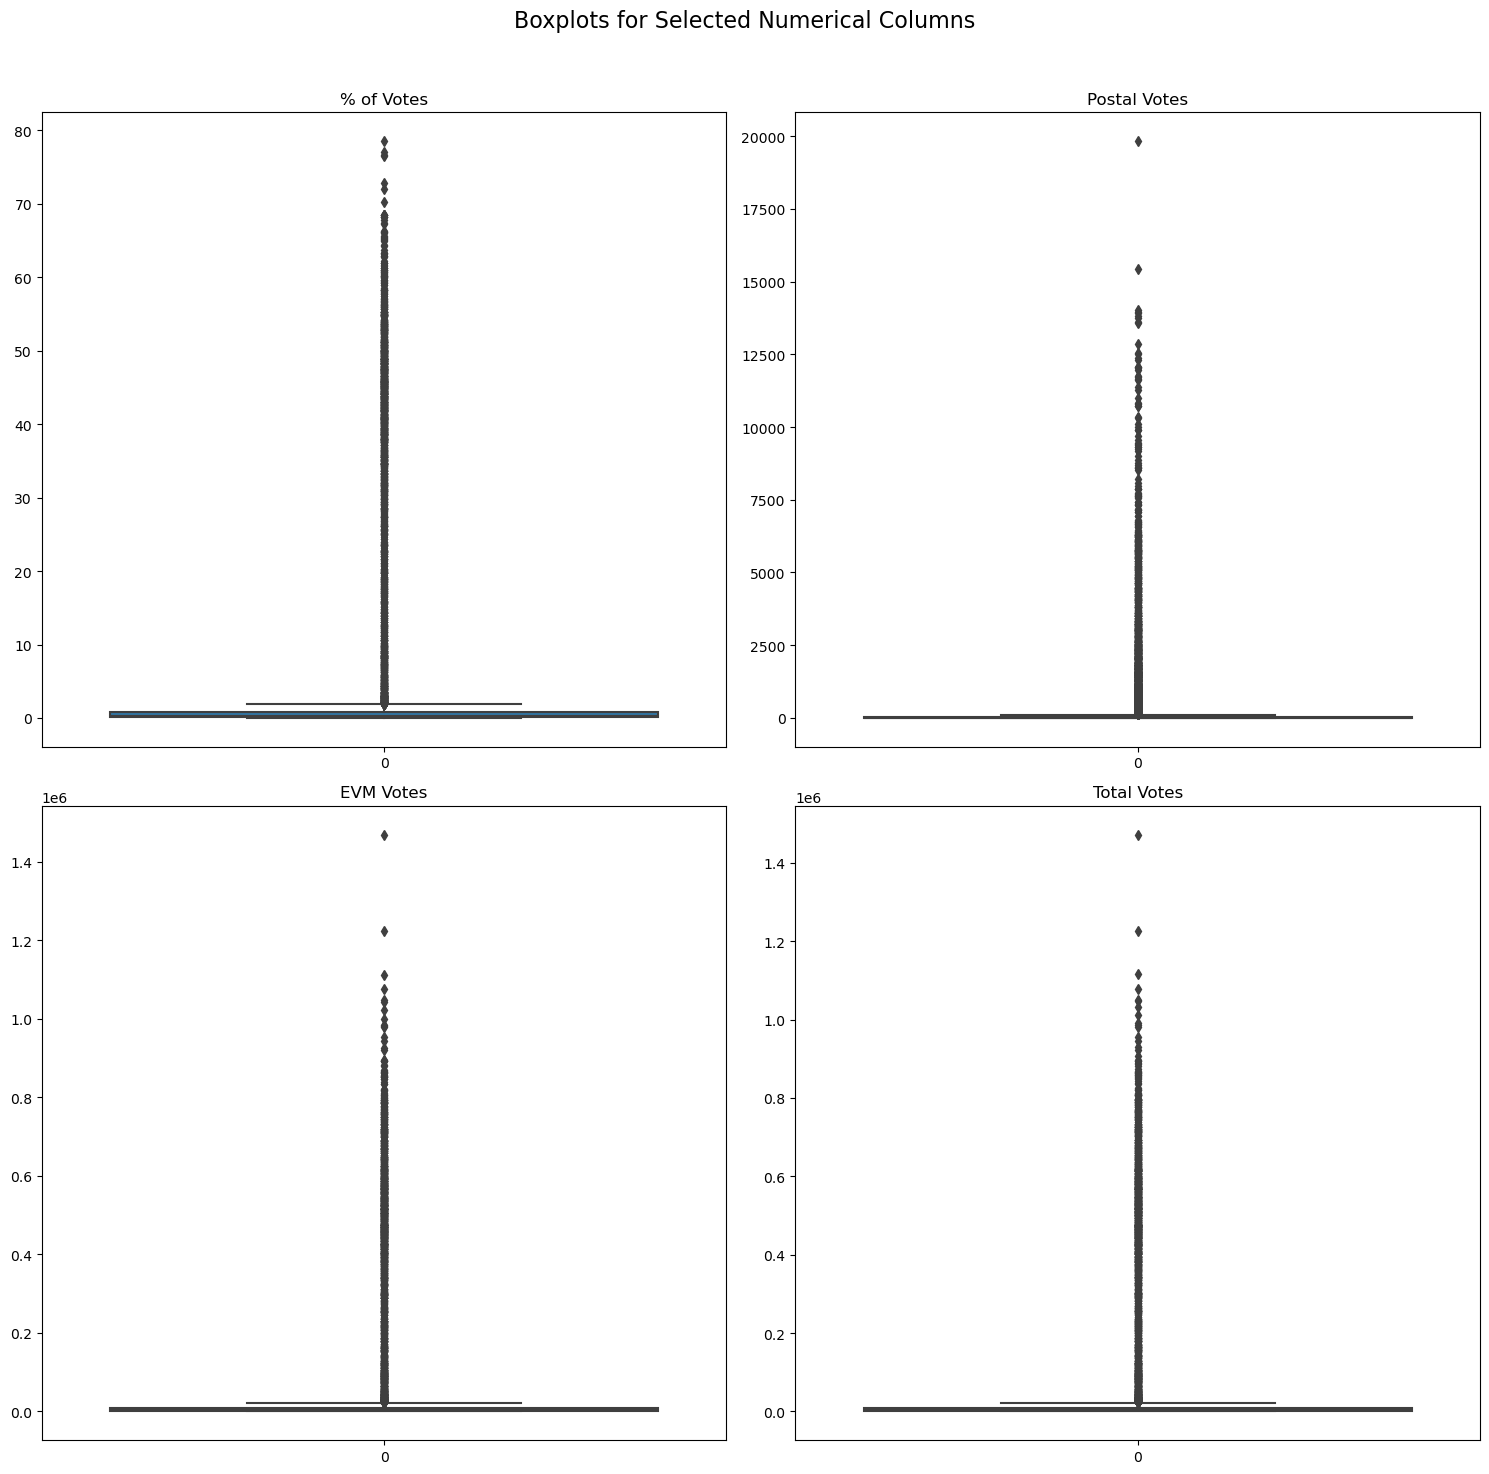

In [12]:
columns = [
    '% of Votes', 'Postal Votes', 'EVM Votes', 'Total Votes'
]

# Create a subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Boxplots for Selected Numerical Columns', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each specified column
for ax, col in zip(axes, columns):
    sns.boxplot(data=data[col], ax=ax)
    ax.set_title(col)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [13]:
data['Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Andaman Nicobar Democratic Congress',
       'Communist Party of India (Marxist)', 'Independent',
       'All India Anna Dravida Munnetra Kazhagam', 'Bahujan Samaj Party',
       'Socialist Unity Centre Of India (COMMUNIST)', 'None of the Above',
       'Telugu Desam', 'Yuvajana Sramika Rythu Congress Party',
       'Telugu Nava Garjana Party', 'Jatiya Jana Sena Party',
       'Jaibhim Rao Bharat Party', 'Pyramid Party of India',
       'Republican Party of India', 'Liberation Congress Party',
       'Republican Party of India (A)',
       'Peoples Party of India (Democratic)', 'Dalita Bahujana Party',
       'Bharatha Chaitanya Yuvajana Party', 'Jai Bharat National Party',
       'Andhra Rastra Praja Samithi',
       'Jaathia Chethi Vruthula Ikya Vedika Party', 'Samajwadi Party',
       'All India Kisan Janatha party', 'Bhartiya Panchyat Party',
       'Challengers Party', 'Bharat Adivasi Party',
       'Telugu Rajad

In [14]:
len(data['Party'].unique())

746

In [15]:
data['Party'].value_counts()

Party
Independent                     3920
None of the Above                542
Bahujan Samaj Party              488
Bharatiya Janata Party           441
Indian National Congress         328
                                ... 
Republican Sena                    1
Rashtriya Janmanch (Secular)       1
Adarsh Nyay Rakshak Party          1
Aapka Gantantra Party              1
Indian Unity Centre                1
Name: count, Length: 746, dtype: int64

In [16]:
top_10_parties = data['Party'].value_counts().nlargest(10)

print(top_10_parties)

Party
Independent                                    3920
None of the Above                               542
Bahujan Samaj Party                             488
Bharatiya Janata Party                          441
Indian National Congress                        328
Socialist Unity Centre Of India (COMMUNIST)     150
Peoples Party of India (Democratic)              79
Samajwadi Party                                  71
Communist Party of India (Marxist)               52
All India Trinamool Congress                     48
Name: count, dtype: int64


In [17]:
data.isna().sum()

S.N             0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
State           0
Constituency    0
dtype: int64

In [18]:
missing_df =  data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( data))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
S.N,0,0.0
Candidate,0,0.0
Party,0,0.0
EVM Votes,0,0.0
Postal Votes,0,0.0
Total Votes,0,0.0
% of Votes,0,0.0
State,0,0.0
Constituency,0,0.0


In [19]:
data[data.duplicated(keep=False)]

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency


In [20]:
data.duplicated().sum()

0

In [21]:
data.shape

(8902, 9)

In [22]:
cat_cols=data.select_dtypes(include='object').columns.tolist()
cat_cols

['Candidate', 'Party', 'State', 'Constituency']

In [23]:

cat_df = data[cat_cols].melt(var_name='column', value_name='value').value_counts().reset_index(name='count').sort_values(by=['column', 'count'])

# Display summary statistics of the original categorical variables
display(data[cat_cols].describe())

# Optionally display the new DataFrame with counts
display(cat_df)

,Candidate,Party,State,Constituency
count,8902,8902,8902,8902
unique,8099,746,36,543
top,NOTA,Independent,Maharashtra,KARUR - 23
freq,542,3920,1169,55


,column,value,count
1165,Candidate,RAMPRASAD PRAJAPATI,1
1166,Candidate,RAVIDAS MEHROTRA,1
1167,Candidate,RAMPRASAD PATEL,1
1168,Candidate,RAMPRASAD,1
1169,Candidate,RAMNIWASH,1
...,...,...,...
7,State,Telangana,542
4,State,West Bengal,549
3,State,Uttar Pradesh,931
2,State,Tamil Nadu,989


In [24]:
data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1


In [25]:


for col in cat_cols:
    unique_values = len(data[col].unique())
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Candidate':
8099


Unique values in column 'Party':
746


Unique values in column 'State':
36


Unique values in column 'Constituency':
543




In [26]:
data.columns

Index(['S.N', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       '% of Votes', 'State', 'Constituency'],
      dtype='object')

In [27]:
data.describe()

,S.N,EVM Votes,Postal Votes,Total Votes,% of Votes
count,8902.000000,8.902000e+03,8902.000000,8.902000e+03,8902.000000
mean,10.818243,7.207582e+04,420.636711,7.249646e+04,6.088488
std,8.252271,1.788713e+05,1339.607914,1.798988e+05,14.630082
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,5.000000,1.085000e+03,3.000000,1.094250e+03,0.090000
50%,9.000000,2.768500e+03,9.000000,2.781000e+03,0.240000
75%,15.000000,9.677000e+03,49.000000,9.759500e+03,0.810000
max,55.000000,1.468549e+06,19827.000000,1.471885e+06,78.540000


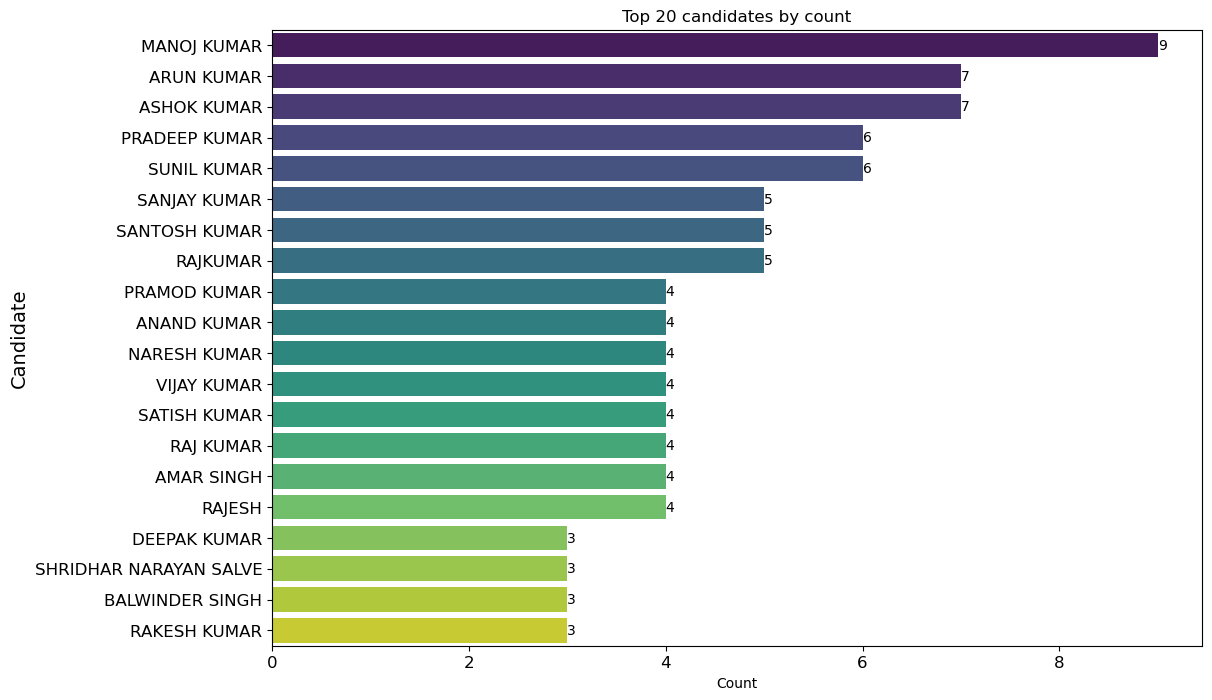

In [28]:
candidate_counts = data[data['Candidate'] != 'NOTA']['Candidate'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=candidate_counts[:20], y=candidate_counts[:20].index, palette='viridis')
plt.title("Top 20 candidates by count")
plt.xlabel("Count")
plt.ylabel("Candidate", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding text annotations
for i, count in enumerate(candidate_counts[:20]):
    plt.text(count, i, str(count), color='black', va='center')

plt.show()

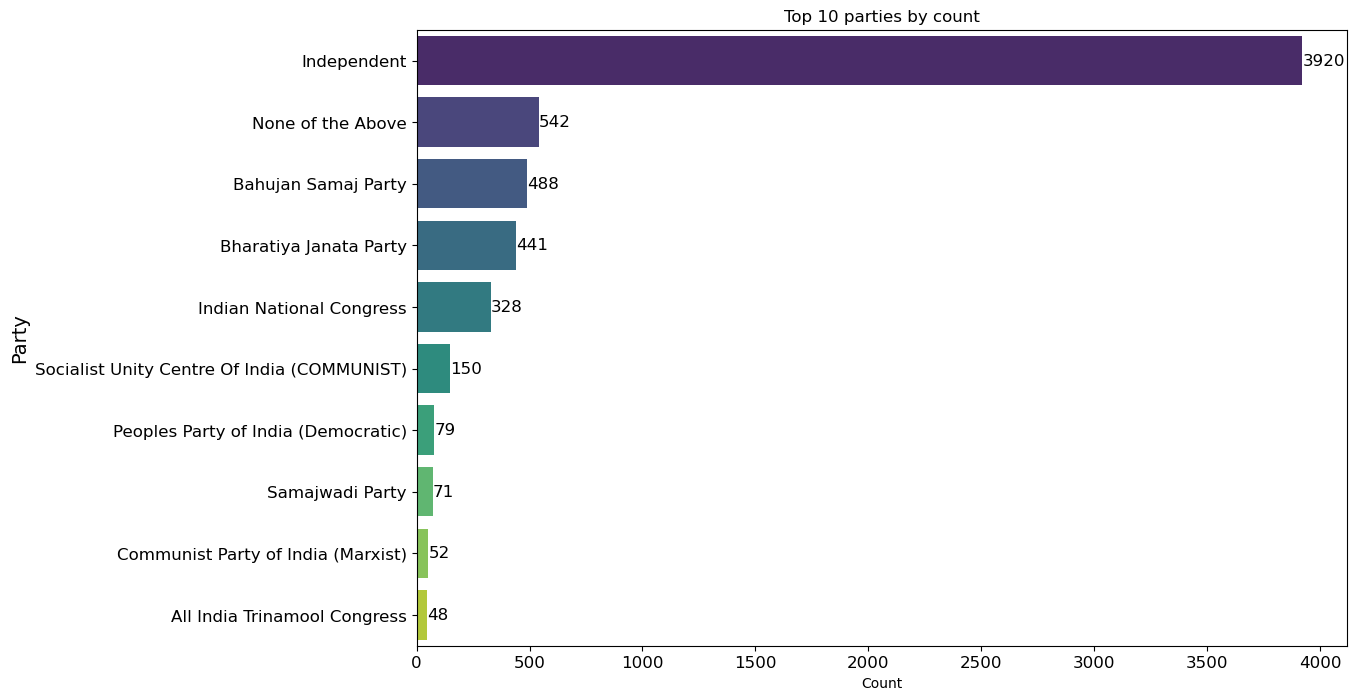

In [29]:
Party_counts = data['Party'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=Party_counts[:10], y=Party_counts[:10].index, palette='viridis')
plt.title("Top 10 parties by count")
plt.xlabel("Count")
plt.ylabel("Party", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations to the bars
for i, count in enumerate(Party_counts[:10]):
    plt.text(count, i, str(count), color='black', va='center', fontsize=12)

plt.show()

In [30]:
data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1


In [31]:
total_votes = data['Total Votes']
total_votes_mean=total_votes.mean()
total_votes_median=total_votes.median()
total_votes_mode=total_votes.mode()
total_votes_q1=total_votes.quantile(0.25)
total_votes_q3=total_votes.quantile(0.75)
total_votes_std=total_votes.std()
total_votes_iqr=total_votes_q3-total_votes_q1
votes_skewness=total_votes.skew()

print("Voter Turnout Analysis:")
print("- Mean Turnout:", total_votes_mean)
print("- Median Turnout:", total_votes_median)
print("- Standard Deviation of Turnout:", total_votes_std)
print("- 25th Percentile (Q1) Turnout:", total_votes_q1)
print("- 75th Percentile (Q3) Turnout:", total_votes_q3)
print("- Interquartile Range (IQR) of Turnout:", total_votes_iqr)
print("- Skewness of Turnout:", votes_skewness)


# print("Voter Turnout Analysis: ")
# print("Mean turnout: ",total_votes_mean)
# print("Median Turnout: ",total_votes_median)
# print("Mode Turnout: ",total_votes_mode)
# print("Q1 Turnout: ",total_votes_q1)
# print("Q3 Turnout: ",total_votes_q3)
# print("IQR Turnout: ",total_votes_iqr)
# print("Skewness Turnout: ",votes_skewness)

Voter Turnout Analysis:
- Mean Turnout: 72496.45529094586
- Median Turnout: 2781.0
- Standard Deviation of Turnout: 179898.77363734288
- 25th Percentile (Q1) Turnout: 1094.25
- 75th Percentile (Q3) Turnout: 9759.5
- Interquartile Range (IQR) of Turnout: 8665.25
- Skewness of Turnout: 2.7023822883237703


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


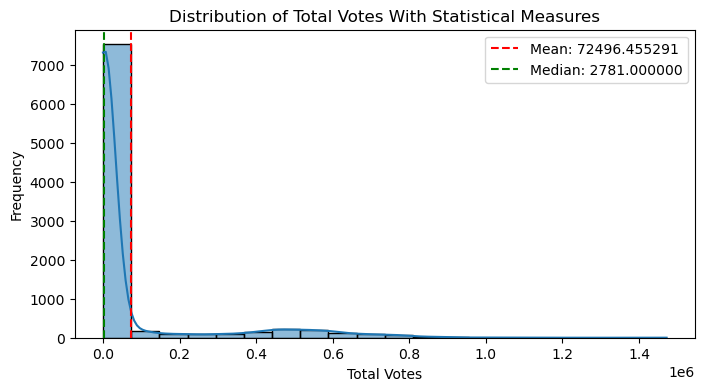

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(total_votes,bins=20,kde=True)
plt.axvline(total_votes_mean,color='r',linestyle='--',label=f"Mean: {total_votes_mean:2f}")
plt.axvline(total_votes_median,color='g',linestyle='--',label=f"Median: {total_votes_median:2f}")
plt.title('Distribution of Total Votes With Statistical Measures')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [33]:
n_bootstraps=1000
boostrap_means=[]

for i in range(n_bootstraps):
    bootstrap_sample=data['Total Votes'].sample(replace=True)
    boostrap_mean=bootstrap_sample.mean()
    boostrap_means.append(boostrap_mean)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


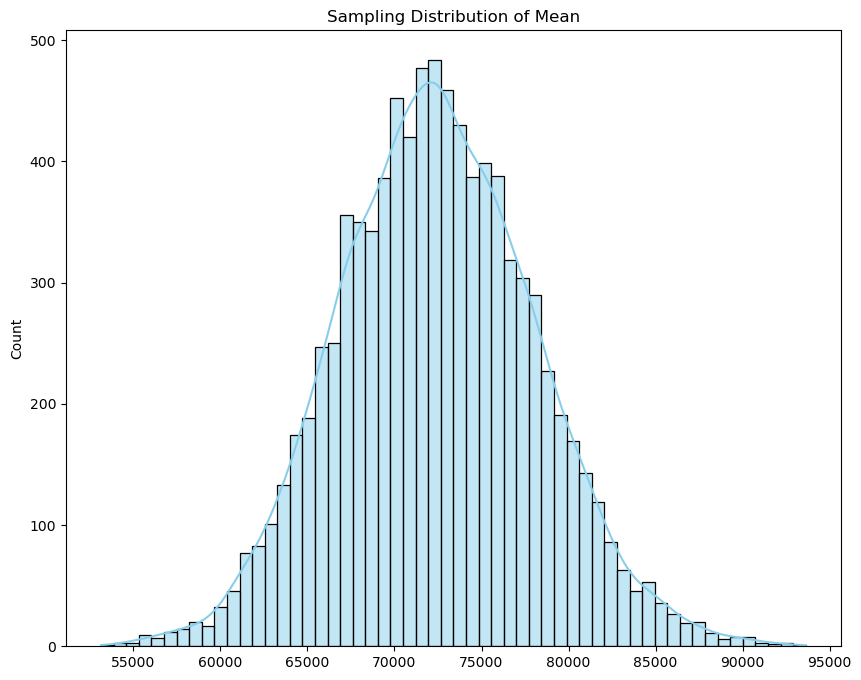

In [34]:
num_samples=len(data)
sample_size=1000

sample_means=np.zeros(num_samples)


for i in range(num_samples):
    sample=np.random.choice(data['Total Votes'],size=sample_size,replace=True)
    sample_means[i]=np.mean(sample)

plt.figure(figsize=(10,8))
sns.histplot(sample_means,kde=True,color='skyblue')
plt.title("Sampling Distribution of Mean")
plt.show()

In [35]:
len(data['Constituency'].unique())

543

In [36]:
data['Total constituency Votes']=data.groupby('Constituency')['Total Votes'].transform(sum)
data['Vote share']=(data['Total Votes']/data['Total constituency Votes'])*100
party_vote_share=data.groupby('Party')['Vote share'].sum().reset_index()
party_vote_share['Normalised Vote share']=(party_vote_share['Vote share']/party_vote_share['Vote share'].sum())*100

top_parties=party_vote_share.sort_values(by="Normalised Vote share",ascending=False).head(20)

C:\Users\User\AppData\Local\Temp\ipykernel_29308\3823494423.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data['Total constituency Votes']=data.groupby('Constituency')['Total Votes'].transform(sum)


In [37]:
top_parties

,Party,Vote share,Normalised Vote share
158,Bharatiya Janata Party,19484.425624,35.949125
289,Indian National Congress,11408.035636,21.048036
617,Samajwadi Party,2695.188610,4.972673
69,All India Trinamool Congress,1967.799041,3.630626
282,Independent,1633.242235,3.013362
121,Bahujan Samaj Party,1170.937810,2.160402
250,Dravida Munnetra Kazhagam,1046.758706,1.931289
227,Communist Party of India (Marxist),989.038763,1.824795
744,Yuvajana Sramika Rythu Congress Party,985.514435,1.818292
539,Rashtriya Janata Dal,933.885481,1.723036


C:\Users\User\AppData\Local\Temp\ipykernel_29308\2988850745.py:14: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


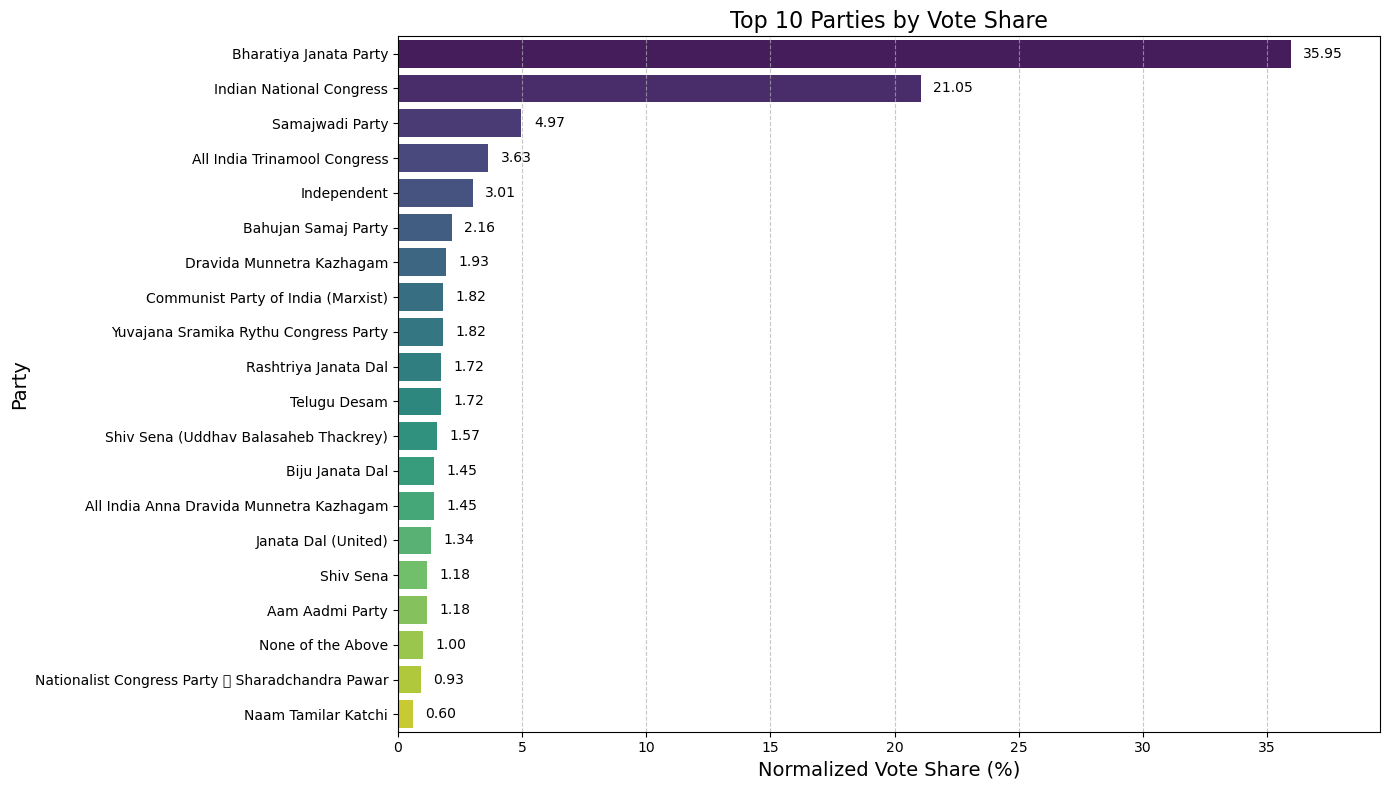

In [38]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_parties, x='Normalised Vote share', y='Party', palette='viridis')

for i, v in enumerate(top_parties['Normalised Vote share']):
    ax.text(v + 0.5, i, f"{v:.2f}", color='black', va='center')

plt.title('Top 10 Parties by Vote Share', fontsize=16)
plt.xlabel('Normalized Vote Share (%)', fontsize=14)
plt.ylabel('Party', fontsize=14)

plt.xlim(0, top_parties['Normalised Vote share'].max() * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [39]:
data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Total constituency Votes,Vote share
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,50.582182
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,38.535607
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,4.075768
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,2.971153
4,5,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,1.087826


In [40]:
data['EVM Votes'].value_counts().sum()

8902

In [41]:
np.sort(data['Postal Votes'].unique())

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.4013e+04, 1.5431e+04,
       1.9827e+04])

In [42]:
data = data[data['Postal Votes'] > 0]

In [43]:
np.sort(data['Postal Votes'].unique())

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.4013e+04, 1.5431e+04,
       1.9827e+04])

In [44]:
evm_votes_mean = data['EVM Votes'].mean()
postal_votes_mean = data['Postal Votes'].mean()

In [45]:
data['EVM Votes'].value_counts().sum()

8324

In [46]:
data['Postal Votes'].value_counts().sum()

8324

In [47]:
data.columns

Index(['S.N', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       '% of Votes', 'State', 'Constituency', 'Total constituency Votes',
       'Vote share'],
      dtype='object')

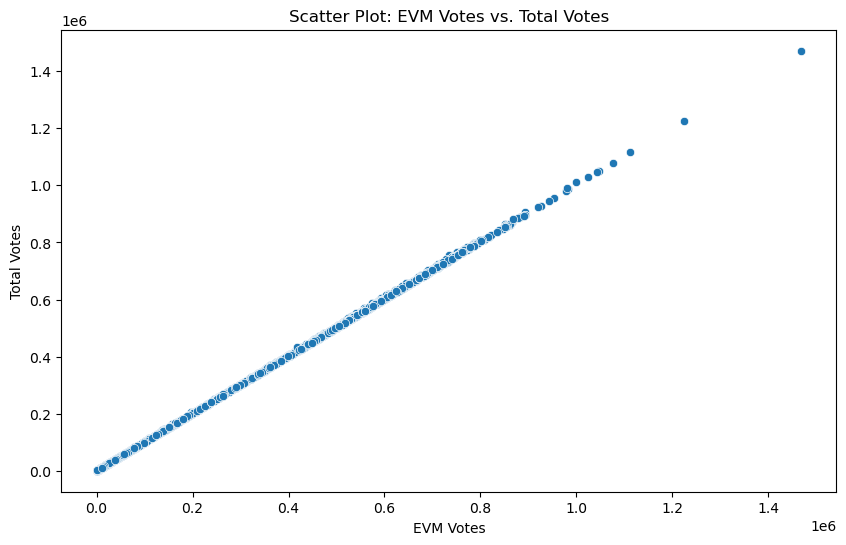

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EVM Votes', y='Total Votes', data=data)
plt.title('Scatter Plot: EVM Votes vs. Total Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Total Votes')
plt.show()

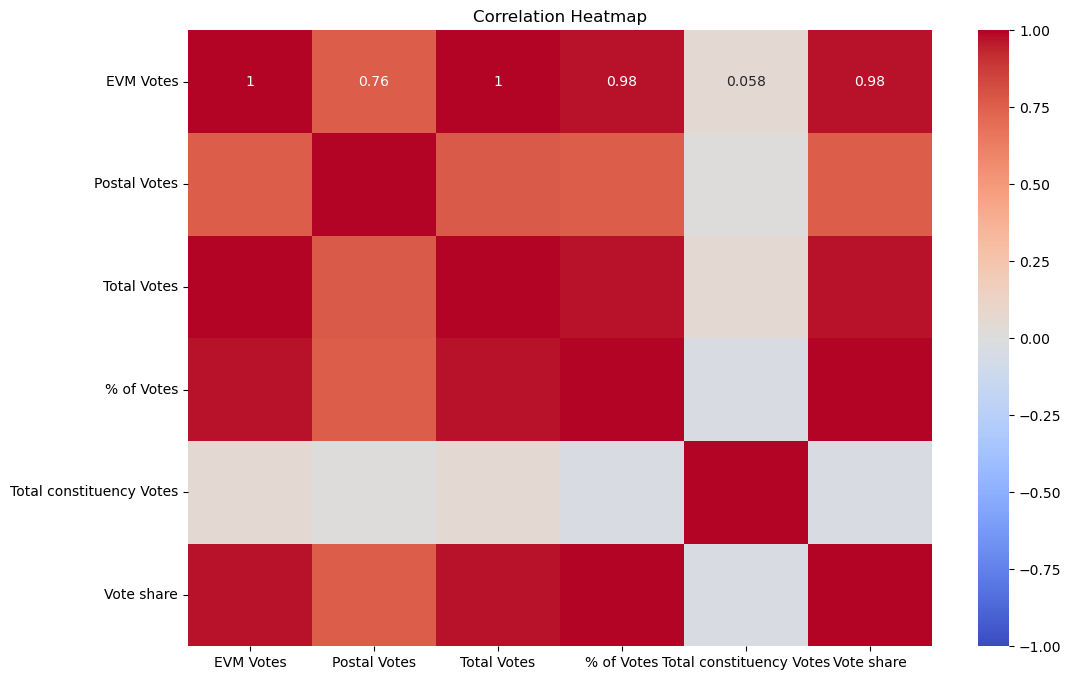

In [49]:
plt.figure(figsize=(12, 8))
corr_matrix = data[['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes', 'Total constituency Votes', 'Vote share']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

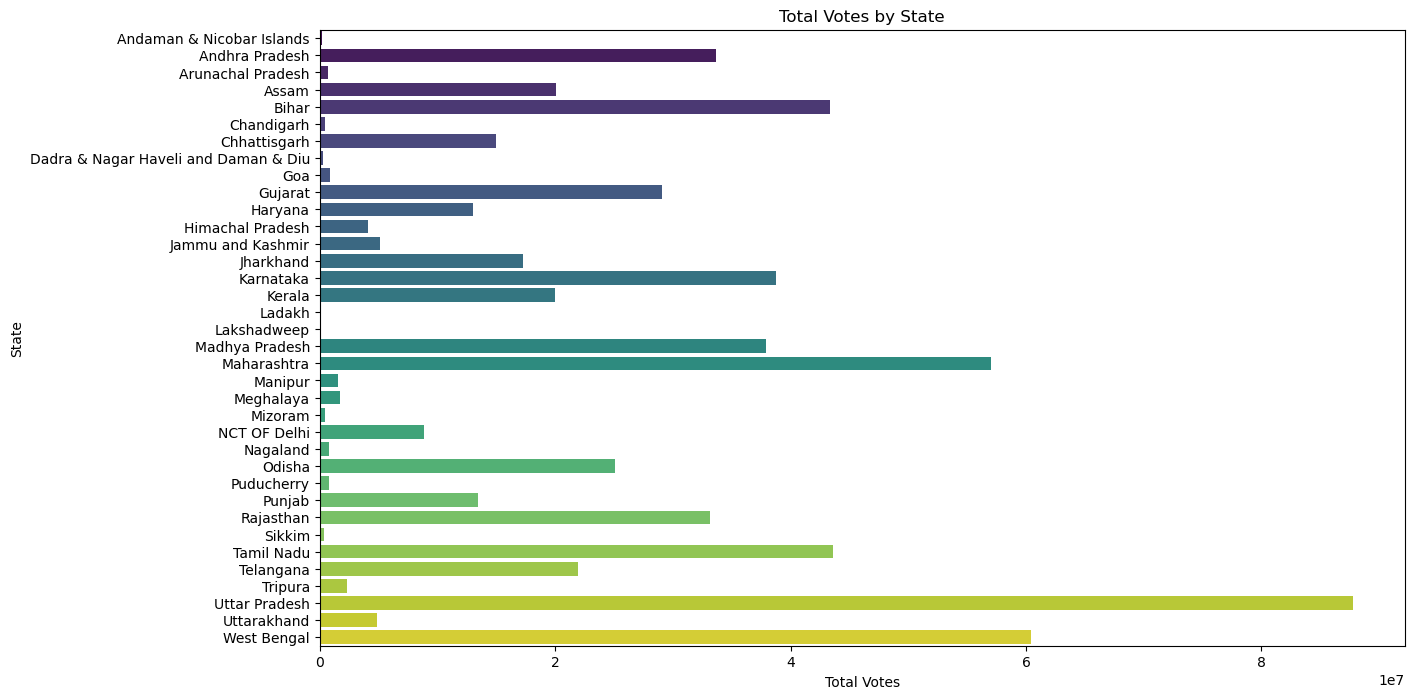

In [50]:
state_total_votes = data.groupby('State')['Total Votes'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Votes', y='State', data=state_total_votes, palette='viridis')
plt.title('Total Votes by State')
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.show()

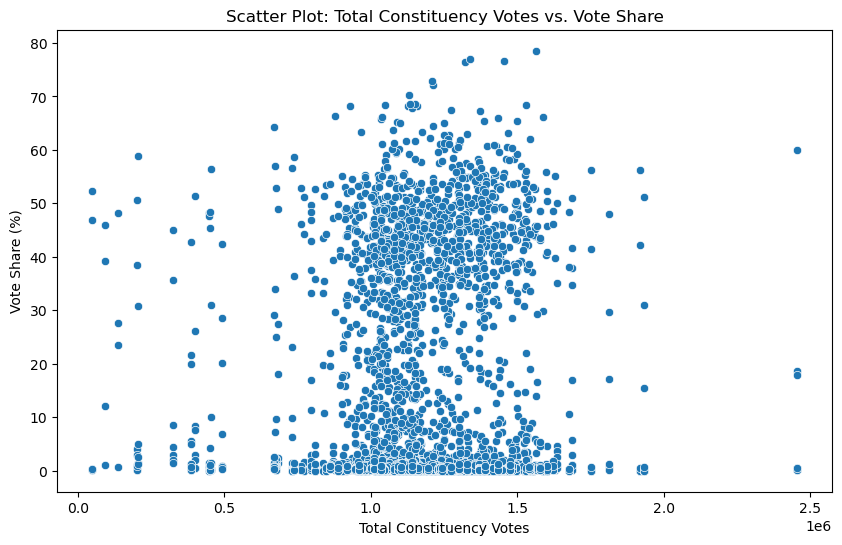

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total constituency Votes', y='Vote share', data=data)
plt.title('Scatter Plot: Total Constituency Votes vs. Vote Share')
plt.xlabel('Total Constituency Votes')
plt.ylabel('Vote Share (%)')
plt.show()

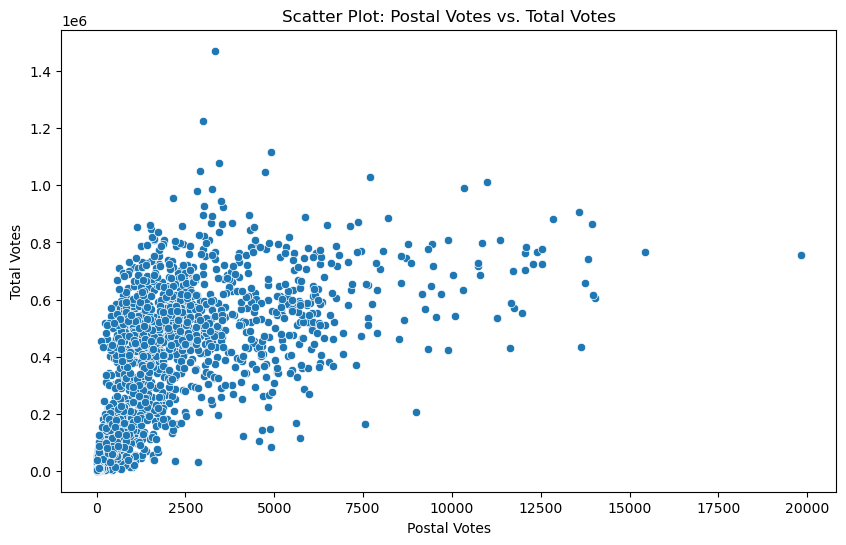

In [52]:

# Hypothesis 5: Postal Votes vs. Total Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Postal Votes', y='Total Votes', data=data)
plt.title('Scatter Plot: Postal Votes vs. Total Votes')
plt.xlabel('Postal Votes')
plt.ylabel('Total Votes')
plt.show()

Pearson correlation between Postal Votes and Total Votes: 0.77


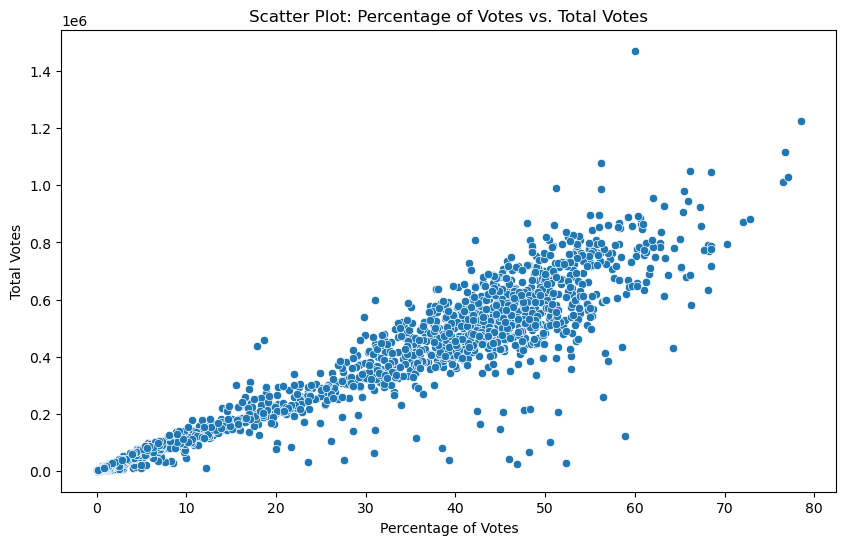

In [53]:
postal_total_corr = data['Postal Votes'].corr(data['Total Votes'])
print(f'Pearson correlation between Postal Votes and Total Votes: {postal_total_corr:.2f}')

# Hypothesis 6: Percentage of Votes and Candidate's Total Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% of Votes', y='Total Votes', data=data)
plt.title('Scatter Plot: Percentage of Votes vs. Total Votes')
plt.xlabel('Percentage of Votes')
plt.ylabel('Total Votes')
plt.show()

In [54]:
percent_total_corr = data['% of Votes'].corr(data['Total Votes'])
print(f'Pearson correlation between Percentage of Votes and Total Votes: {percent_total_corr:.2f}')

Pearson correlation between Percentage of Votes and Total Votes: 0.98


In [55]:
top_10_candidates = data.sort_values(by='Total Votes', ascending=False).head(10)

# Display the top 10 candidates
print(top_10_candidates[['Candidate', 'Party', 'Total Votes','State']])

                  Candidate                         Party  Total Votes  \
535         RAKIBUL HUSSAIN      Indian National Congress    1471885.0   
3289        SHANKAR LALWANI        Bharatiya Janata Party    1226751.0   
3522  SHIVRAJ SINGH CHOUHAN        Bharatiya Janata Party    1116460.0   
2483       DR C N MANJUNATH        Bharatiya Janata Party    1079002.0   
1387      BRIJMOHAN AGRAWAL        Bharatiya Janata Party    1050351.0   
8565      ABHISHEK BANERJEE  All India Trinamool Congress    1048230.0   
1664              C R PATIL        Bharatiya Janata Party    1031065.0   
1590              AMIT SHAH        Bharatiya Janata Party    1010972.0   
7049        EATALA RAJENDER        Bharatiya Janata Party     991042.0   
2461      SHOBHA KARANDLAJE        Bharatiya Janata Party     986049.0   

               State  
535            Assam  
3289  Madhya Pradesh  
3522  Madhya Pradesh  
2483       Karnataka  
1387    Chhattisgarh  
8565     West Bengal  
1664         Gujarat  
1

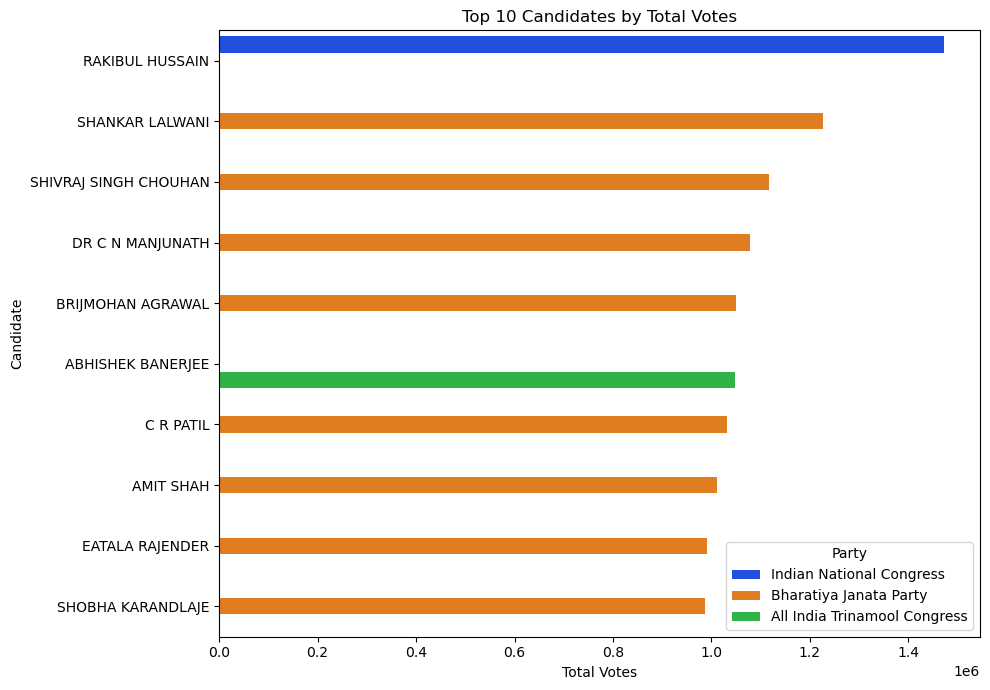

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x="Total Votes",y='Candidate',hue='Party',data=top_10_candidates,palette="bright")
plt.title('Top 10 Candidates by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Candidate')
plt.tight_layout()
plt.show()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8324 entries, 0 to 8901
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.N                       8324 non-null   int64  
 1   Candidate                 8324 non-null   object 
 2   Party                     8324 non-null   object 
 3   EVM Votes                 8324 non-null   float64
 4   Postal Votes              8324 non-null   float64
 5   Total Votes               8324 non-null   float64
 6   % of Votes                8324 non-null   float64
 7   State                     8324 non-null   object 
 8   Constituency              8324 non-null   object 
 9   Total constituency Votes  8324 non-null   float64
 10  Vote share                8324 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 780.4+ KB


In [58]:
data.columns

Index(['S.N', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       '% of Votes', 'State', 'Constituency', 'Total constituency Votes',
       'Vote share'],
      dtype='object')

In [59]:
data['State'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT OF Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [60]:
data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Total constituency Votes,Vote share
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,50.582182
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,38.535607
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,4.075768
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,2.971153
4,5,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,1.087826


In [61]:
data['Constituency'].value_counts()

Constituency
Peddapalle - 2     42
NAMAKKAL - 16      40
Chevella - 10      37
COIMBATORE - 20    37
Warangal - 15      37
                   ..
Daman & Diu - 1     4
Bardoli - 23        4
Ladakh - 1          4
Nagaland - 1        4
Dibrugarh - 13      4
Name: count, Length: 542, dtype: int64

In [62]:
    data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Total constituency Votes,Vote share
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,50.582182
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,38.535607
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,4.075768
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,2.971153
4,5,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,202514.0,1.087826


In [63]:
data.columns

Index(['S.N', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       '% of Votes', 'State', 'Constituency', 'Total constituency Votes',
       'Vote share'],
      dtype='object')

In [64]:
data_encoded = pd.get_dummies(data, columns=['Party', 'State', 'Constituency'])

In [65]:
features = [col for col in data_encoded.columns if col not in ['Total Votes', 'S.N', 'Candidate']]
X = data_encoded[features]
y = data_encoded['Total Votes']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3076023.7655178425


In [71]:
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 3076023.7655178425
R^2 Score: 0.9999110170468647
Mean Absolute Error (MAE): 350.246186186186


In [72]:
data.columns

Index(['S.N', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       '% of Votes', 'State', 'Constituency', 'Total constituency Votes',
       'Vote share'],
      dtype='object')